# Part1
## Exercises
Chapter 1 (Don't forget that you should be answering these in an IPython notebook.)

* **List three different real networks and state the nodes and links for each of them.**
* Communication networks, describing which communication devices interact with each other, through wired internet connections    or  wireless links, are at the heart of the modern communication system. Nodes - communication devices(phones, routers etc) Links - wires, signals transmitted between them.
* Power grid, a network of generators and transmission lines, supplies with energy virtually all modern technology. Nodes - users (companies, houses, flats, power suppliers) links - wires
* Metablic networks. Nodes - tiny molecules Links - tiny molecules and the links are chemical reactions governed by the laws of chemistry and quantum mechanics
 the nodes of the WWW are web documents and the links are URLs guaranteed by computer algorithms; the nodes of the social network are individuals and the links represent family, professional, friendship, and acquaintance ties.
* **Tell us of the network you are personally most interested in. Address the following questions:**
LinkedIn networks showing the dependencies between people and the companies  
* **What are its nodes and links?**
Nodes: People,companies, LinkedIn users Links: friendships connections, same school, same work place, same localization
* **How large is it?**
128mln nodes (users) 30/04/2016
* **Can be mapped out?**
Yes it can be mapped out using LinkedIn API
* **Why do you care about it?**
It can help me understanding my personal professional network and get dream job
* **In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book.
Chapter 2

Section 2.5 states that real networks are sparse. Can you think of a real network where each node has many connections? Is that network still sparse? If yes, can you explain why?
There are more questions on Chapter 2 below.


# Part 2 
Exercises:

* Go to the NetworkX project's tutorial page. The goal of this exercise is to create your own notebook that contains the entire tutorial. You're free to add your own (e.g. shorter) comments in place of the ones in the official tutorial - and change the code to make it your own where ever it makes sense. (There is an error in the tutorial about accessing edges. Can you find it, and solve the problem?)
* Write the solution exercise 2.1 (the 'Königsberg Problem') from NS in your notebook.
* Solve exercise 2.3 ('Graph representation') from NS using NetworkX in your notebook. (You don't have to solve the last sub-question about cycles of length 4 ... but I'll be impressed if you do it).
* Solve exercise 2.5 ('Bipartite Networks') from NS using NetworkX in your notebook.

# NetworkX Tutorial

In [1]:
import networkx as nx

In [2]:
G=nx.Graph()
G.add_node(1)
G.add_nodes_from([2,3])
H=nx.path_graph(10)
G.add_nodes_from(H) #G graph containing nodes of H and G 
G.add_node(H) #Graph G contains graph H as a node 

In [3]:
G.add_edge(1,2)
e=(2,3)
G.add_edge(*e) #unpack edge tuple
G.add_edges_from([(1,2),(1,3)])
G.add_edges_from(H.edges())
#G.remove_node(H)
G.clear()        #Clearing graph from nodes and edges 
G.add_edges_from([(1,2),(1,3)])
G.add_node(1)
G.add_edge(1,2)
G.add_node("spam")       # adds node "spam"
G.add_nodes_from("spam") # adds 4 nodes: 's', 'p', 'a', 'm'
G.number_of_nodes()
G.number_of_edges()

2

In [4]:
G.nodes()

['a', 1, 2, 3, 'spam', 'm', 'p', 's']

In [5]:
G.edges()

[(1, 2), (1, 3)]

In [6]:
G.neighbors(1)

[2, 3]

In [7]:
G.remove_nodes_from("spam")
G.nodes()

[1, 2, 3, 'spam']

In [8]:
G.remove_edge(1,3) #It was mistake should be (1,3) instead (1,2)

In [9]:
H=nx.DiGraph(G) # create a DiGraph using the connections from G
H.edges()

[(1, 2), (2, 1)]

In [10]:
edgelist=[(0,1),(1,2),(2,3)]
H=nx.Graph(edgelist)

In [11]:
G[1]

{2: {}}

In [12]:
G[1][2]


{}

In [13]:
G.add_edge(1,3)
G[1][3]['color']='blue'

In [14]:
FG=nx.Graph()
FG.add_weighted_edges_from([(1,2,0.125),(1,3,0.75),(2,4,1.2),(3,4,0.375)])
for n,nbrs in FG.adjacency_iter():
    for nbr,eattr in nbrs.items():
        data=eattr['weight']
        if data<0.5: print('(%d, %d, %.3f)' % (n,nbr,data))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [15]:
for (u,v,d) in FG.edges(data='weight'):
     if d<0.5: print('(%d, %d, %.3f)'%(n,nbr,d))

(4, 3, 0.125)
(4, 3, 0.375)


In [16]:
G = nx.Graph(day="Friday")
G.graph
{'day': 'Friday'}

{'day': 'Friday'}

In [17]:
G.graph['day']='Monday'
G.graph
{'day': 'Monday'}

{'day': 'Monday'}

In [18]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.node[1]


{'time': '5pm'}

In [19]:
G.node[1]['room'] = 714
G.nodes(data=True)

[(1, {'room': 714, 'time': '5pm'}), (3, {'time': '2pm'})]

In [20]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3,4),(4,5)], color='red')
G.add_edges_from([(1,2,{'color':'blue'}), (2,3,{'weight':8})])
G[1][2]['weight'] = 4.7
G.edge[1][2]['weight'] = 4

In [21]:
DG=nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5), (3,1,0.75)])
DG.out_degree(1,weight='weight')

0.5

In [22]:
DG.degree(1,weight='weight')

1.25

In [23]:
DG.successors(1)

[2]

In [24]:
DG.neighbors(1)

[2]

In [25]:
H = nx.Graph(G)

# TBC


## 2.1 (the 'Königsberg Problem')
* a) We have 4 nodes: 2 with 3 links and 2 with 2 links. Taking into account that to have a Euler path we have to have no more than 2 nodes with odd numbers we can draw a line without raising our pencil from the paper. 
* b) We have 5 nodes: 4 with 3 links and 1 with 4 links. We have 4 nodes with odd number of links so it is more than 2 so we cannot draw a line without raising our pencil from the paper.
* c) We have 12 nodes: 6 with 2 links and 6 with 4 links. We have no nodes with odd number of links so we can draw a line without raising our pencil from the paper.
* d) We have 6 nodes: 1 with one link, 3 with 2 links, 2 with 6 links. We have just one node with odd number of links so we can draw a line without raising our pencil from the paper.

## 2.3 ('Graph representation') 

Undirected graph of 6 nodes and 7 links and 

In [26]:
import networkx as nx
import scipy as sp
import matplotlib.pyplot as plt

UG=nx.Graph()
UG.add_nodes_from([1,2,3,4,5,6])
UG.add_edges_from([(1,2),(2,3),(3,1),(3,2),(6,3),(6,1),(2,4),(4,1)])
A1 = nx.adjacency_matrix(UG)
L1 = UG.edges()
Acc = nx.average_clustering(UG)
UGb = nx.Graph()
UGb.add_nodes_from([1,2,3,4,5,6]) 
UGb.add_edges_from([(1,2),(2,3),(3,1),(3,2),(5,3),(5,1),(2,4),(4,1)])
A1b = nx.adjacency_matrix(UGb)
L1b = UGb.edges()



DG=nx.DiGraph()
DG.add_nodes_from(UG)
DG.add_edges_from([(1,2),(2,3),(3,1),(3,2),(6,3),(6,1),(2,4),(4,1)])
A2 = nx.adjacency_matrix(DG)


In [27]:
print('Adjacency Matrix before swap')
print(A1.todense()) 
print('\n Adjacency Matrix after swap')
print(A1b.todense())
print('\n Linked list before swap')
print(L1)
print('\n Linked list after swap')
print(L1b)
print('\n Average cluster coefficient')
print(Acc) 

Adjacency Matrix before swap
[[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]

 Adjacency Matrix after swap
[[0 1 1 1 1 0]
 [1 0 1 1 0 0]
 [1 1 0 0 1 0]
 [1 1 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 0 0 0]]

 Linked list before swap
[(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)]

 Linked list after swap
[(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (3, 5)]

 Average cluster coefficient
0.638888888889


Adjacency matrix will swap the rows 5 and 6 consecutively and in term sof linked list only the edges with changed point will be changed the rest will stay the same.

e) The difference in both of this representations is just visual. Memory occupation is as follows: https://www.dropbox.com/s/uxoel4tms5wb1ya/Differences%20in%20memory.jpg?dl=0 

In [28]:
CycUG = nx.cycle_basis(UG,1) #Cycles from node 1 in UG (3)
print(CycUG)

[[3, 6, 1], [2, 4, 1], [2, 3, 1]]


In [29]:
for i in nx.simple_cycles(DG): #Cycles in DG (2)
    print i

[1, 2, 4]
[1, 2, 3]
[2, 3]


## 2.5. Bipartite Networks

In [30]:
q25=nx.Graph()
q25.add_nodes_from([1,2,3,4,5,6,7,8,9,10,11])
q25.add_edges_from([(1,7),(2,9),(3,7),(3,8),(3,9),(4,9),(4,10),(5,9),(5,11),(6,11)])
nx.adjacency_matrix(q25).todense()

matrix([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]])

why is it block diagonal matrix (isnt it) - Ask Sune

In [31]:
purple=nx.adjacency_matrix(q25).todense()
green=nx.adjacency_matrix(q25).todense()
purple[0:5]=0
green[6:10]=0

In [32]:
green

matrix([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]])

In [33]:
purple

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]])

In [34]:
Bip=nx.Graph()
from networkx.algorithms import bipartite
Bip.add_nodes_from([1,2,3,4,5,6], bipartite=0) # Add the node attribute "bipartite" Violet
Bip.add_nodes_from([7,8,9,10,11], bipartite=1) # Green
Bip.add_edges_from([(1,7),(2,9),(3,7),(3,8),(3,9),(4,9),(4,10),(5,9),(5,11),(6,11)])
top, bottom = bipartite.sets(Bip)

BipGraphBottom = bipartite.projected_graph(Bip, bottom)
print("Bottom Edges")
print BipGraphBottom.edges()
print("Bottom Adjacency Matrix")
print nx.adjacency_matrix(BipGraphBottom).todense()
print
BipGraphTop = bipartite.projected_graph(Bip, top)
print("Top Edges")
print BipGraphTop.edges()
print("Top Adjacency Matrix")
print nx.adjacency_matrix(BipGraphTop).todense()


Bottom Edges
[(8, 9), (8, 7), (9, 10), (9, 11), (9, 7)]
Bottom Adjacency Matrix
[[0 1 0 0 1]
 [1 0 1 1 1]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [1 1 0 0 0]]

Top Edges
[(1, 3), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5), (5, 6)]
Top Adjacency Matrix
[[0 0 1 0 0 0]
 [0 0 1 1 1 0]
 [1 1 0 1 1 0]
 [0 1 1 0 1 0]
 [0 1 1 1 0 1]
 [0 0 0 0 1 0]]


In [35]:
from __future__ import division
def get_average_degree(graph, nodes=None, print_edges=False):
    if not nodes:
        nodes = graph.nodes()
    deg_graph = graph.degree(nbunch=nodes)
    sum_of_edges = sum(deg_graph.values())
    deg = sum_of_edges/len(nodes)
    if print_edges:
        return deg, deg_graph.values()
    return deg

degree_p, edge_p = get_average_degree(q25, [1,2,3,4,5,6], print_edges=True)
print "list of degree of edges - purple one:", edge_p
print "average degree bipartite network - purple one:", degree_p

degree_g, edge_g = get_average_degree(q25, [7,8,9,10,11], print_edges=True)
print "list of degree of edges - green one:", edge_g
print "average degree bipartite network - green one:", degree_g
    

list of degree of edges - purple one: [1, 1, 3, 2, 2, 1]
average degree bipartite network - purple one: 1.66666666667
list of degree of edges - green one: [1, 4, 1, 2, 2]
average degree bipartite network - green one: 2.0


In [36]:
degree_pp, edge_pp = get_average_degree(BipGraphTop, print_edges=True)
print "list of degree of edges in projected network - purple one:", edge_pp
print "average degree of projected network - purple one:", degree_pp

degree_pg, edge_pg = get_average_degree(BipGraphBottom, print_edges=True)
print "list of degree of edges in projected network - green one:", edge_pg
print "average degree of projected network - green one:", degree_pg



list of degree of edges in projected network - purple one: [1, 3, 4, 3, 4, 1]
average degree of projected network - purple one: 2.66666666667
list of degree of edges in projected network - green one: [2, 4, 1, 1, 2]
average degree of projected network - green one: 2.0


## Part 3


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn

#Let's do a gentle start and use the random library generate 5000 data points from a Gaussian distribution with μ=2μ=2 and σ=0.125σ=0.125.

my,sigma=2,0.125
list1 = np.random.normal(my,sigma,5000)

#Now, let's use numpy.histogram to bin those number into 10 bins. What does the numpy.
#histogram function return?

hist=np.histogram(list1,10)
print hist[0]

print hist[1]

[  19   96  315  746 1227 1243  852  378  102   22]
[ 1.57433663  1.6578959   1.74145517  1.82501445  1.90857372  1.99213299
  2.07569226  2.15925153  2.2428108   2.32637007  2.40992934]


#Do the two arrays have the same length?

#No, first amount have altimes one less item.

Difference (dist)
0.0835592707249


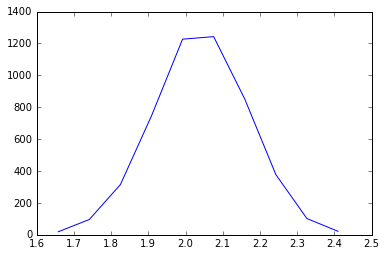

In [38]:
#Then we use matplotlib.pyplot.plot to plot the binned data. 
#You will have to deal with the fact that the counts- 
#and bin-arrays have different lengths.

%matplotlib inline

dist = (hist[1][1]-hist[1][0])/1
hist1=hist[1][0:-1]+dist
hist1
print("Difference (dist)")
print dist

plt.plot(hist1,hist[0])
# It is used the middle of the elements as value for make deal with the difference

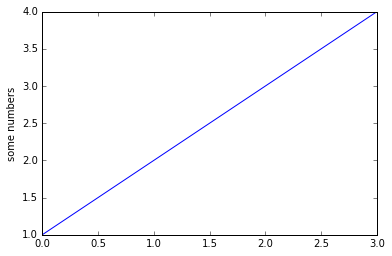

In [52]:
plt.plot([1,2,3,4])
plt.ylabel('some numbers')

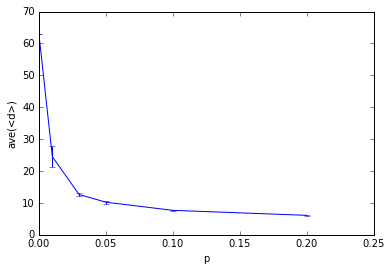

In [69]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

list_avg = []
list_std = []
for p in [0, 0.01, 0.03, 0.05, 0.1, 0.2]:
    list = []
    for i in range(5):
        watts_strogatz = nx.watts_strogatz_graph(500,4,p)
        avg_length = nx.average_shortest_path_length(watts_strogatz)
        list.append(avg_length)
    list_avg.append(np.mean(list))
    list_std.append(np.std(list))
    # print(list)
# print(list_avg)
# print(list_std)
plt.errorbar([0, 0.01, 0.03, 0.05, 0.1, 0.2], list_avg, list_std,)
plt.ylabel('ave(<d>)')
plt.xlabel('p')

In [39]:
#But binning real numbers into a fixed number of bins is easy when numpy.histogram does all the work and 
#finds the right bin boundaries for you. Now we'll generate a bunch of integers and set the bin boundaries
#manually. This time, let's grab data from a Poisson distribution. As it turns out numpy also has some convenient
#random number generators. Use numpy.random.poisson to generate 5000 numbers drawn from a Poisson distribution 
#characterized by λ=10λ=10. Find the maximum and minimum value of your 5000 random numbers.

random_poisson = np.random.poisson(10, 5000)
print"Max"
print max(random_poisson)
print"Min"
print min(random_poisson)

Max
23
Min
1


In [40]:
#ONE DOT MISSING
#Binning and plotting degree distributions.
#Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
#First we have to figure out which values the ER parameters (N and p) should assume. It's easy to see that N=5000N=5000, 
#but how do you find pp? Hint: The parameter λλ in the Poisson distribution corresponds to the average degree, so you have 
#to find a pp that results in an average degree, k=10k=10. And you know that ⟨k⟩=p(N−1)⟨k⟩=p(N−1), which will give you pp. 
#Note that Python by default returns the result of divisions as the most precise of the datatypes involved (for instance, 
#try computing 1/2 and 1.0/2.0 in your notebook). If you want division to always give you a decimal number, you can enter 
#from __future__ import division at the beginning of your notebook.

ER = nx.gnp_random_graph(5000,(10.0/4999.0))



In [41]:
deghist=nx.degree_histogram(ER)

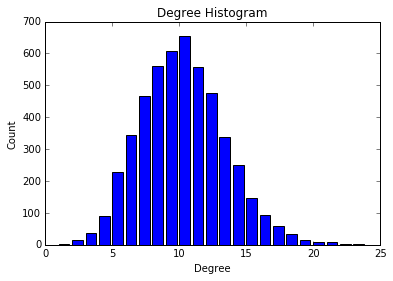

In [42]:
import matplotlib.pyplot as plt
plt.bar(range(0,len(deghist)),deghist)
plt.title('Degree Histogram')
plt.ylabel('Count')
plt.xlabel('Degree')

## Part 4 


## 3.1 Erdos Renyi Networks
Consider an Erdős-Rényi network with N = 3,000 nodes, connected to
each other with probability p = 10–3.
(a) What is the expected number of links, 〈L〉?
 L = p*[N*(N-1)/2]


In [43]:
from __future__ import division
import math

N = 3000
p = math.pow(10, -3)
ERG31 = nx.erdos_renyi_graph(N,p)

In [44]:
L = p*(N*(N-1)/2)
print "Number of links in this network is =",L 

Number of links in this network is = 4498.5


(b) In which regime is the network?
The network is in superstrict regime $$⟨k⟩ > 1 (p>\frac{1}{N})$$


In [45]:
k=p*(N-1)
print '({0}) > {1} ({2} > {3})'.format(k, 1, p, 1/N)

(2.999) > 1 (0.001 > 0.000333333333333)


(c) Calculate the probability pc so that the network is at the critical
point.

pc = 1/N

In [46]:
pc=1/N
print 'Critical point for this network is pc =',pc

#conditions for the emergence of the giant component  is (k)=1

kc=pc*(N-1)
print "With this probability pc: <k> = ",kc

Critical point for this network is pc = 0.000333333333333
With this probability pc: <k> =  0.999666666667


(d) Given the linking probability p = 10–3, calculate the number of
nodes Ncr so that the network has only one component.


In [47]:
Ncr=(kc/p)+1
print "Number of nodes with p={0} and <k>={1} is {2}".format(p, kc, Ncr)

Number of nodes with p=0.001 and <k>=0.999666666667 is 1000.66666667


(e) For the network in (d), calculate the average degree 〈kcr〉 and the
average distance between two randomly chosen nodes 〈d〉.

In [48]:
ERG31e = nx.erdos_renyi_graph(int(Ncr), p)

Kcr = get_average_degree(ERG31e)
print "average degree of the random network is (d) = ",Kcr

average degree of the random network is (d) =  1.048


In [49]:
lnN = math.log(int(Ncr))
print "ln(N) =",lnN

ln(N) = 6.90775527898


In [50]:
#average distance between two random nodes in network (Formula 3.19 from book)
d = lnN/math.log(Kcr)
print "average distance between two random nodes for the netwrok is (d) =",d


average distance between two random nodes for the netwrok is (d) = 147.338458579


In [51]:
(f) 

NameError: name 'f' is not defined

Paths. Plot a random network with 200 nodes and an average degree of 1.5. 
(I suggest using networkx.draw and reading the documentation carefully to get an overview of all the options 
and what they look like. For example, you may want to shrink the node size).
* Extract the Giant Connected Component, GCC. (Hint. You can use networkx.connected_component_subgraphs)
* Choose a node at random from the GCC. (Hint: You may want to try random.choice.)
* Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest networkx.single_source_shortest_path_length)
* Plot the GCC with the following choice of colors. Starting node black ("#000000"). The nodes 2 steps away red ("#ff0000"). All other nodes blue ("#A0CBE2"). Again, I suggest using networkx.draw and reading the documentation carefully find out how to color individual nodes.


In [ ]:
import random as rand
N = 200
k = 1.5

p=k/(N-1)
ERG1 = nx.erdos_renyi_graph(N, p)

#Extract the Giant Connected Component, GCC. (Hint. You can use networkx.connected_component_subgraphs)
sub_graphs = sorted(nx.connected_component_subgraphs(ERG1), key=len)
#generator of graphs, one for each connected component of ERG1
gcc = sub_graphs[-1]
#Choose a node at random from the GCC.
rand_node = rand.choice(gcc.nodes())
#Find all nodes that are precisely 2 steps away from that node.
nodes_two_steps = nx.single_source_shortest_path_length(gcc, source=rand_node, cutoff=2)
print "chosen random starting node is {0} \nit has following nodes precisely two steps away:{1}".format(rand_node, nodes_two_steps)

In [ ]:
pos = nx.spring_layout(ERG1, pos=nodes_two_steps)
nx.draw(gcc, pos, with_labels=False, node_size=50, node_color='#A0CBE2')
nx.draw_networkx_nodes(gcc, pos, with_labels=False, node_size=50, nodelist=nodes_two_steps.keys(), node_color='#FF0000')
nx.draw_networkx_nodes(gcc, pos, with_labels=False, node_size=50, nodelist=[rand_node], node_color='#000000')

plt.draw()